# SHAP (SHapley Additive exPlanations)

## Load data

In [1]:
import pandas as pd

df_base = pd.read_csv('../../../data/house-price.csv', index_col=0)
df_base

,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,109,2011.0
1 McKenzie Corner,470000,4,2,2.0,279,2005.0
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,177,2005.0
98 Centennial Avenue,441000,4,2,2.0,195,2004.0


## Feature selection

In [2]:
y = df_base['PRICE']
X = df_base.drop(columns='PRICE')

## Train model

In [3]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X, y)
model.score(X, y)

0.9746449876358452

In [4]:
pd.DataFrame({
    'y_true': y,
    'y_pred': model.predict(X)
})

,y_true,y_pred
ADDRESS,,
1 Datchet Turn,270000,270000.0
1 McKenzie Corner,470000,470000.0
...,...,...
93 Centennial Avenue,350000,350000.0
98 Centennial Avenue,441000,441000.0


In [5]:
df_base

,PRICE,BEDROOMS,BATHROOMS,GARAGE,FLOOR_AREA,BUILD_YEAR
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,109,2011.0
1 McKenzie Corner,470000,4,2,2.0,279,2005.0
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,177,2005.0
98 Centennial Avenue,441000,4,2,2.0,195,2004.0


## SHAP: Model explainability

How the values of the features affect the prediction of the model.

### Explainer

In [6]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

### Explain individual prediction

In [7]:
shap.initjs()
idx = 0
sample = X.iloc[idx].copy()
shap.force_plot(explainer.expected_value, shap_values[idx], sample)

### Full dataset

#### Decision plot

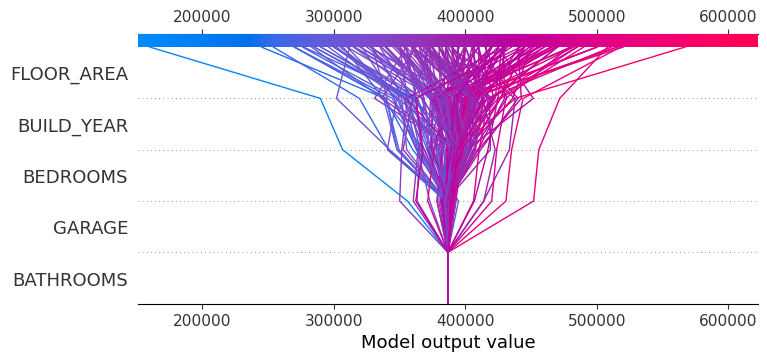

In [8]:
shap.decision_plot(explainer.expected_value, shap_values, X)

#### Force plot

In [9]:
shap.force_plot(explainer.expected_value, shap_values, X)

#### Summary plot

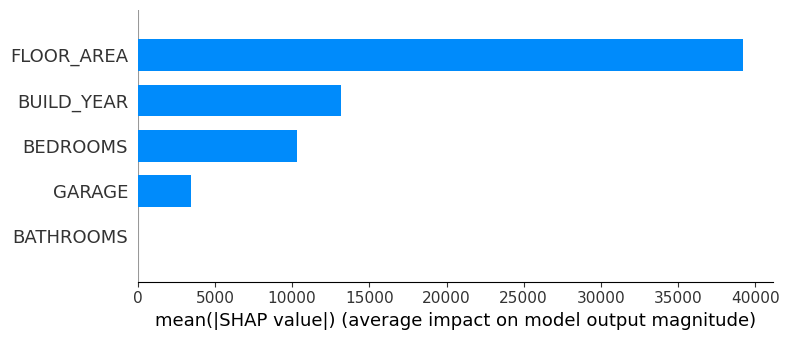

In [10]:
shap.summary_plot(shap_values, X, plot_type='bar')

## Export artifacts 

### SHAP explainer

In [11]:
import pickle

with open('../artifacts/explainer.pkl', 'wb') as f:
    pickle.dump(explainer, f)

### Model

In [12]:
import pickle

with open('../artifacts/model.pkl', 'wb') as f:
    pickle.dump(model, f)